# Face Detection System

In [ ]:
!pip install mtcnn # Multi-Task Cascaded Convolutional Neural Networks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


LIBRARIES

In [ ]:
import imutils #(Ip tasks such as resizing)
import numpy as np
import cv2 # allows you to perform image processing and computer vision tasks
from google.colab.patches import cv2_imshow # creating image in colab
from IPython.display import display, Javascript # interactive display module
from google.colab.output import eval_js # module for managing output
from base64 import b64decode # module for encoding decoing binary data to plain text
import matplotlib.pyplot as plt
%matplotlib inline
import mtcnn # library for face detection and recognition
from mtcnn.mtcnn import MTCNN # detecting faces in images

CODE TO START THE WEBCAM

In [ ]:
#  captures a photo from the user's webcam and saves it as a JPEG image file.
def take_photo(filename='photo.jpg', quality=0.8):
  # captures an image from the user's webcam- takephoto()
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

TAKES A PHOTO


In [ ]:
image_file = take_photo()

<IPython.core.display.Javascript object>

DISPLAY THE IMAGE

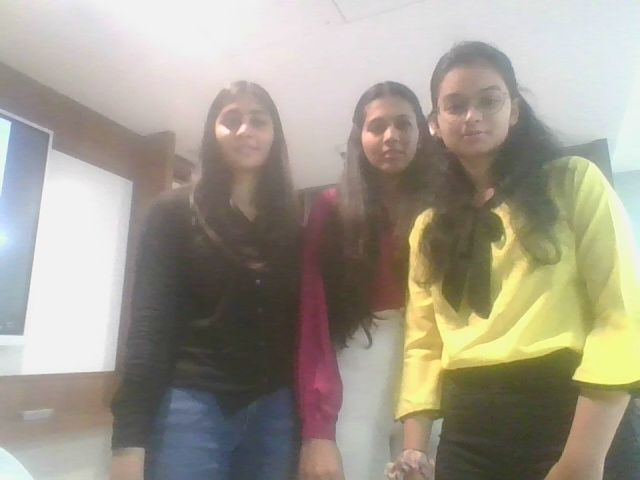

In [ ]:
image = cv2.imread(image_file)
cv2_imshow(image)

USING MTCNN
(MTCNN or Multi-Task Cascaded Convolutional Neural Networks is a neural network which detects faces and facial landmarks on images.)

In [ ]:
# capable of detecting faces in images and returning information about the location and size of the faces.
detector = MTCNN()
# detect faces in the image
# takes the image as a NumPy array and returns a list of dictionaries
# (information about the location, size, and orientation of the face in the image.)
results = detector.detect_faces(image)

1/1 [==============================] - 0s 158ms/step


DETECTING 5 FEATURES OF FACE

In [ ]:
results

[{'box': [439, 73, 65, 76],
  'confidence': 0.9990975856781006,
  'keypoints': {'left_eye': (457, 104),
   'right_eye': (488, 100),
   'nose': (473, 118),
   'mouth_left': (462, 134),
   'mouth_right': (488, 132)}},
 {'box': [220, 98, 54, 65],
  'confidence': 0.9976383447647095,
  'keypoints': {'left_eye': (235, 121),
   'right_eye': (261, 120),
   'nose': (247, 133),
   'mouth_left': (236, 147),
   'mouth_right': (258, 148)}},
 {'box': [361, 100, 54, 66],
  'confidence': 0.9948714971542358,
  'keypoints': {'left_eye': (378, 126),
   'right_eye': (404, 125),
   'nose': (391, 137),
   'mouth_left': (382, 153),
   'mouth_right': (402, 153)}}]

In [ ]:
# draw an image with detected objects
def draw_facebox_and_keypoints(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=1, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment

RESULT

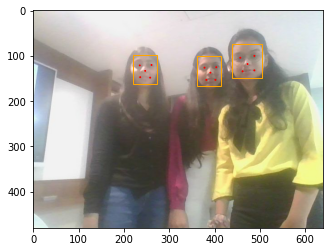

In [ ]:
draw_facebox_and_keypoints('photo.jpg', results)